## Packages

In [2]:
import matplotlib.pyplot as plt
from networkx import nx
import numpy as np
import scipy
import math
from random import randint
import time

## Part 1.1

C:\Users\39335\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


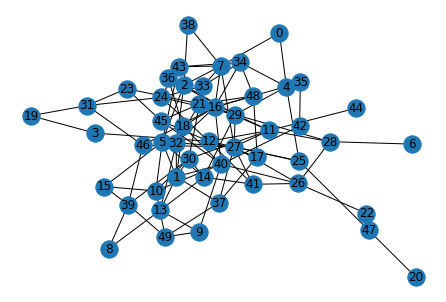

In [3]:
# Generate p-ER random graph
Gp = nx.erdos_renyi_graph(50,0.1) 
nx.draw(Gp, with_labels=True) 
plt.show() 

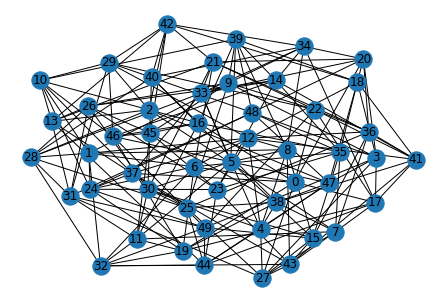

In [133]:
# Generate r-regular random graph
Gr = nx.random_regular_graph(8, 50)
nx.draw(Gr, with_labels=True)
plt.show()

## Part 1.2

In [6]:
# Algebraic method 1 (irreducibility)
def method1(G):
    # Adjacency matrix
    M = nx.to_numpy_matrix(G)
    Mt = np.identity(len(M))
    for i in range(1,len(M)):
        Mt += np.linalg.matrix_power(M,i)
    return np.all(Mt) > 0
method1(Gp)

True

In [7]:
# Algebraic method 2 (eigenvalue of the Laplacian matrix)
def method2(G):
    L = nx.laplacian_matrix(G)
    # Convert scipy matrix to numpy array
    L = scipy.sparse.csr_matrix.toarray(L)
    eigv = np.linalg.eigvals(L)
    # Check
    return (np.sort(eigv)[1]>0)
method2(Gp)

True

In [8]:
# Breadth-frst search algorithm
def BFS(G):
    # Make a list of all the nodes connected to the staring one in a BFS way.
    l = list(nx.bfs_edges(G, randint(0,len(G)-1)))
    # If l contains all nodes it must have the length of G-1 (the node isn't connected to itself)
    if len(l) == len(G)-1:
        return True
    else:
        return False
BFS(Gp)

True

## Part 1.3

In [68]:
# Complexity vs K method 1, p-ER 
y1 = []
x = []
for k in range(10,200,10):
    x.append(k)
    start_time = time.time()
    for i in range(10):
        G = nx.erdos_renyi_graph(k,0.1) 
        method1(G)
    y1.append((time.time() - start_time)/10)

In [69]:
# Complexity vs K method 2, p-ER 
y2 = []
for k in range(10,200,10):
    start_time = time.time()
    for i in range(10):
        G = nx.erdos_renyi_graph(k,0.1) 
        method2(G)
    y2.append((time.time() - start_time)/10)

In [70]:
# Complexity vs K method 3, p-ER 
y3 = []
for k in range(10,200,10):
    start_time = time.time()
    for i in range(10):
        G = nx.erdos_renyi_graph(k,0.1) 
        BFS(G)
    y3.append((time.time() - start_time)/10)

Text(0, 0.5, 'Run-time in seconds')

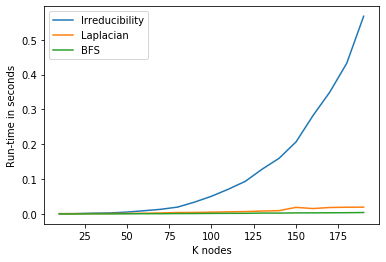

In [71]:
plt.plot(x,y1, label = "Irreducibility")
plt.plot(x,y2, label = "Laplacian")
plt.plot(x,y3, label = "BFS")
plt.legend(loc="upper left")
plt.xlabel('K nodes')
plt.ylabel('Run-time in seconds')

## Part 1.4

Text(0.5, 0, 'p')

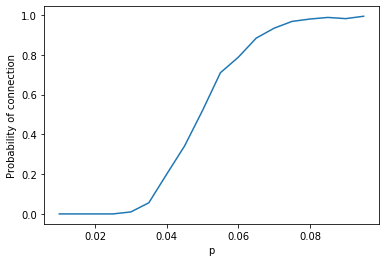

In [100]:
# Probability of connection vs p for ER graph with K = 100
x = []
y = []
p = 0.01
while p < 0.1:
    count = 0
    for i in range(500):
        if BFS(nx.erdos_renyi_graph(100,p)) == True:
            count += 1
    x.append(p)
    y.append(count/500)
    p += 0.005
plt.plot(x,y)
plt.ylabel('Probability of connection')
plt.xlabel('p')

Text(0.5, 0, 'K')

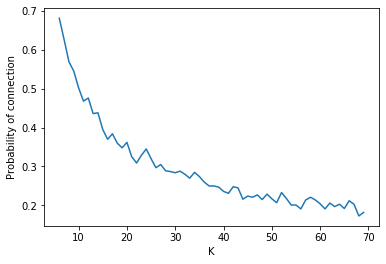

In [101]:
# Probability of connection vs K for r-regular random graph with r = 2
x = []
y = []
for k in range(6,70):
    count = 0
    for i in range(1000):
        if BFS(nx.random_regular_graph(2, k)) == True:
            count += 1
    x.append(k)
    y.append(count/1000)
plt.plot(x,y)
plt.ylabel('Probability of connection')
plt.xlabel('K')

Text(0.5, 0, 'K')

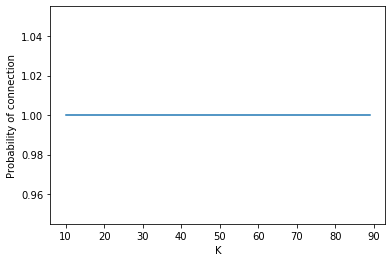

In [107]:
# Probability of connection vs K for r-regular random graph with r = 8
x = []
y = []
for k in range(10,90):
    count = 0
    for i in range(1000):
        if BFS(nx.random_regular_graph(8, k)) == True:
            count += 1
    x.append(k)
    y.append(count/1000)
plt.plot(x,y)
plt.ylabel('Probability of connection')
plt.xlabel('K')